<a href="https://colab.research.google.com/github/anshus07/DNN-PROJECT/blob/main/dnn_lca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,concatenate,MaxPooling2D,Dropout
from tensorflow.keras.models import Model
import shutil
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_CHANNELS=3

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"anshulsongire","key":"a13f9c56117bfd936c43da388a97feb9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle


In [ ]:
!kaggle datasets download -d nikhilroxtomar/brain-tumor-segmentation


Dataset URL: https://www.kaggle.com/datasets/nikhilroxtomar/brain-tumor-segmentation
License(s): unknown
brain-tumor-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip brain-tumor-segmentation.zip -d /content/


Archive:  brain-tumor-segmentation.zip
replace /content/images/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'kaggle.json', 'images', 'brain-tumor-segmentation.zip', 'kaggle (2).json', 'kaggle (1).json', 'masks', 'sample_data']


In [ ]:
import os
Original = os.listdir('/content/images')
Masks = os.listdir('/content/masks')
Original = Original
Masks = Masks
print(len(Original))
print(len(Masks))

X=np.zeros((len(Original),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.float32)
y=np.zeros((len(Masks),IMG_HEIGHT,IMG_WIDTH,1), dtype=np.int32)

3064
3064


In [ ]:
print(X.shape)
print(y.shape)

(3064, 128, 128, 3)
(3064, 128, 128, 1)


In [ ]:
import cv2
import numpy as np
import os

for n, file in enumerate(Original):

    path1 = os.path.join('/content/images', file)
    print(path1)

    img = cv2.imread(path1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))

    X[n] = img / 255.0

    file2 = Masks[n]
    path2 = os.path.join('/content/masks', file2)

    mask = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (128, 128))

    mask = mask / 255.0
    mask = np.expand_dims(mask, axis=-1)

    y[n] = mask


/content/images/178.png
/content/images/357.png
/content/images/387.png
/content/images/2944.png
/content/images/2612.png
/content/images/1395.png
/content/images/85.png
/content/images/2348.png
/content/images/301.png
/content/images/2019.png
/content/images/189.png
/content/images/45.png
/content/images/1987.png
/content/images/285.png
/content/images/309.png
/content/images/2588.png
/content/images/392.png
/content/images/1312.png
/content/images/1560.png
/content/images/738.png
/content/images/2394.png
/content/images/652.png
/content/images/135.png
/content/images/1594.png
/content/images/1115.png
/content/images/1000.png
/content/images/2813.png
/content/images/2055.png
/content/images/690.png
/content/images/353.png
/content/images/1861.png
/content/images/668.png
/content/images/1397.png
/content/images/2332.png
/content/images/1501.png
/content/images/2643.png
/content/images/2115.png
/content/images/1415.png
/content/images/17.png
/content/images/519.png
/content/images/1229.

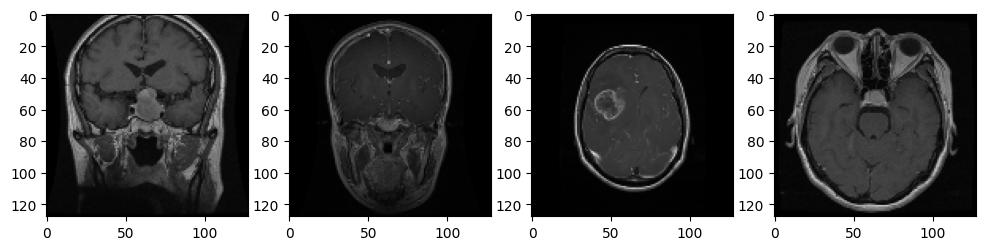

In [ ]:
import matplotlib.pyplot as plt
i = np.random.randint(1, 100)
plt.figure(figsize = (12,15))
plt.subplot(141)
plt.imshow(X[i])

plt.subplot(142)
plt.imshow(X[i+1])

plt.subplot(143)
plt.imshow(X[i+2])

plt.subplot(144)
plt.imshow(X[i+3])

In [ ]:
images = X

print(images.shape)

(3064, 128, 128, 3)


In [ ]:
masks = y
masks.shape

(3064, 128, 128, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,masks,test_size=0.2,random_state=42)

In [ ]:
inputs=tf.keras.layers.Input((128,128,3))


s = inputs

c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.2)(c1)  # Original 0.1
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)


c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.2)(c2)  # Original 0.1
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)


c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

#Expansive path

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.2)(c8)  # Original 0.1
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.2)(c9)  # Original 0.1
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)




outputs = Conv2D(1,(1, 1),activation='sigmoid')(c9)

model = Model(inputs=[inputs], outputs=[outputs])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='binary_crossentropy', metrics=['accuracy'],
              )

In [ ]:
import keras.backend as K

#spe=len(image_generator)//batch_size,
#vs=len(mask_generator)//batch_size,

history=model.fit(X_train, y_train,validation_data = (X_test,y_test),
                  epochs=20,
                  )

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9933 - loss: 0.0175 - val_accuracy: 0.9914 - val_loss: 0.0226
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.9936 - loss: 0.0166 - val_accuracy: 0.9934 - val_loss: 0.0184
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9937 - loss: 0.0162 - val_accuracy: 0.9924 - val_loss: 0.0202
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9940 - loss: 0.0154 - val_accuracy: 0.9928 - val_loss: 0.0193
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.9941 - loss: 0.0151 - val_accuracy: 0.9932 - val_loss: 0.0183
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9942 - loss: 0.0147 - val_accuracy: 0.9932 - val_loss: 0.0188
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9948 - loss: 0.0131 - val_accuracy: 0.9935 - val_loss: 0.0192
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9949 - loss: 0.0130 - val_accuracy: 0.9931 - v

/tmp/ipython-input-3978502248.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', color='green',label='Validation acc')


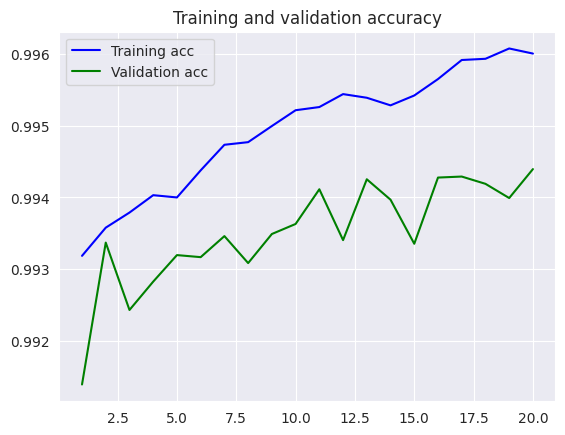

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', color='green',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

/tmp/ipython-input-2865424556.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', color = 'green', label='Validation loss')


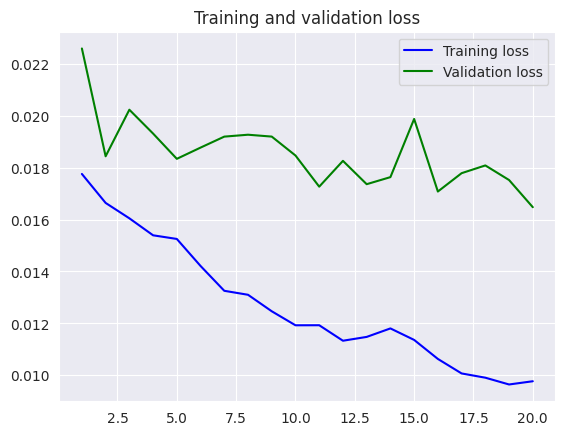

In [ ]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', color = 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def predict_image(img_path, mask_path, model):

    # Read original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))

    display_img = img.copy()  # keep original for plotting

    # Normalize ONCE
    img = img / 255.0
    img = img.astype(np.float32)

    input_img = np.expand_dims(img, axis=0)

    pred = model.predict(input_img, verbose=0)[0]
    pred_mask = (pred > 0.3).astype(np.uint8)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (128, 128))
    mask = mask / 255.0
    mask = np.expand_dims(mask, axis=-1)

    intersection = np.logical_and(mask, pred_mask)
    union = np.logical_or(mask, pred_mask)
    iou = np.sum(intersection) / np.sum(union)

    return display_img, mask, pred_mask.squeeze(), iou


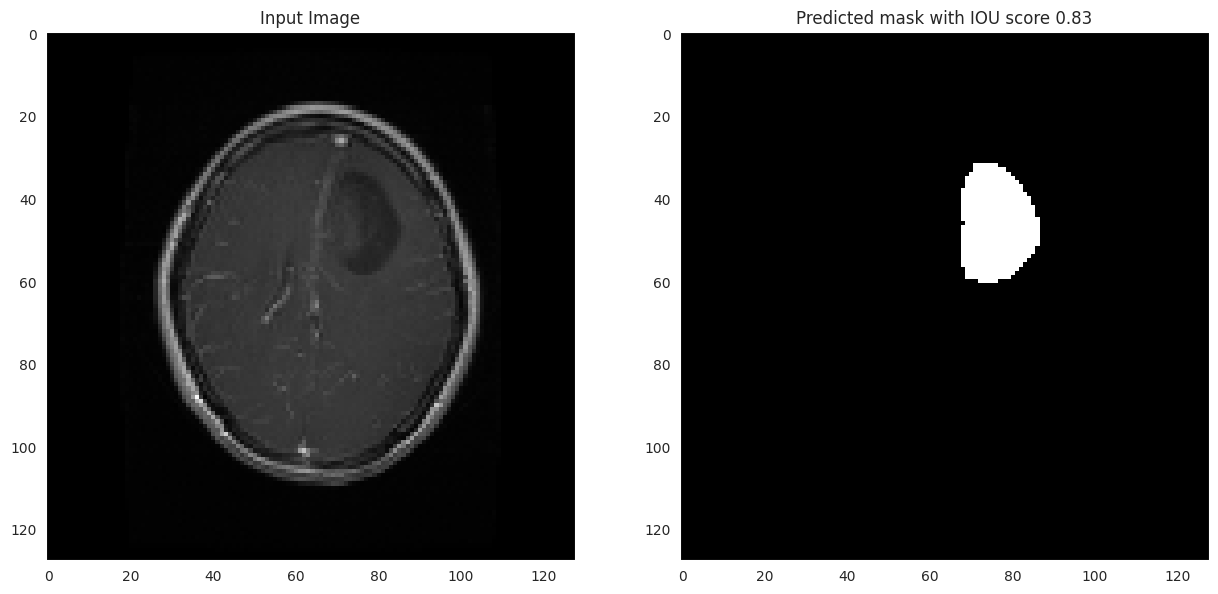

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

img_path = '/content/images/2000.png'
mask_path = '/content/masks/2000.png'

img, mask, pred_mask, iou = predict_image(img_path, mask_path, model)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.set_title("Input Image")
ax1.imshow(img)

ax2.set_title("Predicted mask with IOU score %.2f" % (iou))
ax2.imshow(pred_mask, cmap='gray')

plt.show()


In [ ]:
print(np.min(img), np.max(img))


0 214
